# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Params 
units = "Imperial"
APPID = weather_api_key
q = cities 

In [ ]:
# # # disply all the results 
# for city in cities:
#     q_url = base_url+"units="+units+"&APPID="+APPID+"&q="+city
#     weatherpy = requests.get(q_url).json()
#     #print(weatherpy)
#     print(json.dumps(weatherpy, indent=4, sort_keys=True))  

In [4]:
# create dataframe for city data

weatherpy_df = pd.DataFrame(cities)
weatherpy_df.columns=["City"]
#weatherpy_df.head()


#set aditional columns 
weatherpy_df['Cloudiness'] = ""
weatherpy_df['Country'] = ""
weatherpy_df['Date'] = ""
weatherpy_df['Humidity'] = ""
weatherpy_df['Lat'] = ""
weatherpy_df['Lan'] = ""
weatherpy_df['Max_Temp'] = ""
weatherpy_df['Wind_Speed'] = ""


weatherpy_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lan,Max_Temp,Wind_Speed
0,zyryanka,,,,,,,,
1,trujillo,,,,,,,,
2,atuona,,,,,,,,
3,sitka,,,,,,,,
4,lompoc,,,,,,,,


In [5]:
# setup 
record = 0
set = 1



print("Beginning Data Retrieval")
print("------------------------------")


for index, row in weatherpy_df.iterrows():
# for row in city_df.iterrows():
    city = row['City']
    
    try:
        q_url = base_url+"units="+units+"&APPID="+APPID+"&q="+city
        weatherpy = requests.get(q_url).json()
        
        print(f"processing record {record} of set {set} | {city}")
        
#         city_df.loc[index, 'City'] = response['name']
        weatherpy_df.loc[index, 'Lan'] = weatherpy['coord']['lon']
        weatherpy_df.loc[index, 'Lat'] = weatherpy['coord']['lat']
        weatherpy_df.loc[index, 'Cloudiness'] = weatherpy['clouds']['all']
        weatherpy_df.loc[index, 'Country'] = weatherpy['sys']['country']
        weatherpy_df.loc[index, 'Date'] =  weatherpy['dt']
        weatherpy_df.loc[index, 'Humidity'] = weatherpy['main']['humidity']
        weatherpy_df.loc[index, 'Max_Temp'] = weatherpy['main']['temp_max']
        weatherpy_df.loc[index, 'Wind_Speed']= weatherpy['wind']['speed']
        
        
        record = record + 1
        if record >= 51:
            record= 0
            set = set + 1
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

        
        
# Data Retrieval Complete      

print("---------------------------")
print("Data Retrieval Complete ")
print("---------------------------")

Beginning Data Retrieval
------------------------------
processing record 0 of set 1 | zyryanka
processing record 1 of set 1 | trujillo
processing record 2 of set 1 | atuona
processing record 3 of set 1 | sitka
processing record 4 of set 1 | lompoc
processing record 5 of set 1 | cape town
processing record 6 of set 1 | sofiysk
City not found. Skipping...
processing record 6 of set 1 | vila franca do campo
processing record 7 of set 1 | wukari
processing record 8 of set 1 | amderma
City not found. Skipping...
processing record 8 of set 1 | chara
processing record 9 of set 1 | lata
processing record 10 of set 1 | naze
processing record 11 of set 1 | barentsburg
City not found. Skipping...
processing record 11 of set 1 | ushuaia
processing record 12 of set 1 | maniitsoq
processing record 13 of set 1 | barrow
processing record 14 of set 1 | vaini
processing record 15 of set 1 | grindavik
processing record 16 of set 1 | nocupetaro
processing record 17 of set 1 | taltal
processing record 18 

processing record 18 of set 4 | henties bay
processing record 19 of set 4 | utiroa
City not found. Skipping...
processing record 19 of set 4 | kralendijk
processing record 20 of set 4 | atar
processing record 21 of set 4 | estrela
processing record 22 of set 4 | keflavik
processing record 23 of set 4 | castro
processing record 24 of set 4 | esperance
processing record 25 of set 4 | pevek
processing record 26 of set 4 | noumea
processing record 27 of set 4 | doha
processing record 28 of set 4 | newport
processing record 29 of set 4 | paracuru
processing record 30 of set 4 | pacifica
processing record 31 of set 4 | belaya gora
processing record 32 of set 4 | burica
City not found. Skipping...
processing record 32 of set 4 | cabo san lucas
processing record 33 of set 4 | kaduy
processing record 34 of set 4 | mahebourg
processing record 35 of set 4 | dikson
processing record 36 of set 4 | bowen
processing record 37 of set 4 | bandarbeyla
processing record 38 of set 4 | lebu
processing reco

processing record 32 of set 7 | opuwo
processing record 33 of set 7 | bajil
processing record 34 of set 7 | meadow lake
processing record 35 of set 7 | bridgetown
processing record 36 of set 7 | tabou
processing record 37 of set 7 | upernavik
processing record 38 of set 7 | conde
processing record 39 of set 7 | honiara
processing record 40 of set 7 | saleaula
City not found. Skipping...
processing record 40 of set 7 | ola
processing record 41 of set 7 | korla
processing record 42 of set 7 | isangel
processing record 43 of set 7 | port hawkesbury
processing record 44 of set 7 | rio grande
processing record 45 of set 7 | khash
processing record 46 of set 7 | vihari
processing record 47 of set 7 | nagato
processing record 48 of set 7 | aizkraukle
processing record 49 of set 7 | pochutla
processing record 50 of set 7 | siva
processing record 0 of set 8 | saint-francois
processing record 1 of set 8 | gladstone
processing record 2 of set 8 | siocon
processing record 3 of set 8 | cassilandia


processing record 7 of set 11 | pisco
processing record 8 of set 11 | imbituba
processing record 9 of set 11 | havelock
processing record 10 of set 11 | santa cecilia
processing record 11 of set 11 | gubkinskiy
processing record 12 of set 11 | nizhniy kuranakh
processing record 13 of set 11 | qaqortoq
processing record 14 of set 11 | jodhpur
processing record 15 of set 11 | alekseyevsk
processing record 16 of set 11 | tateyama
processing record 17 of set 11 | harer
processing record 18 of set 11 | el mahalla el kubra
City not found. Skipping...
processing record 18 of set 11 | acarau
processing record 19 of set 11 | yendi
processing record 20 of set 11 | krasnyy kommunar
processing record 21 of set 11 | nizhnevartovsk
processing record 22 of set 11 | kenai
processing record 23 of set 11 | hanzhong
processing record 24 of set 11 | sant julia de loria
processing record 25 of set 11 | ende
processing record 26 of set 11 | marevo
processing record 27 of set 11 | zhukovka
processing record 

In [6]:
weatherpy_df.head(20)


,City,Cloudiness,Country,Date,Humidity,Lat,Lan,Max_Temp,Wind_Speed
0,zyryanka,100,RU,1647913560,90,65.75,150.85,7.99,17.07
1,trujillo,91,PE,1647913560,88,-8.116,-79.03,66.16,10.36
2,atuona,75,PF,1647913561,76,-9.8,-139.0333,79.38,14.45
3,sitka,75,US,1647913561,76,57.0531,-135.33,44.49,3.44
4,lompoc,0,US,1647913561,67,34.6391,-120.4579,69.94,25.99
5,cape town,0,ZA,1647913447,86,-33.9258,18.4232,68.11,12.66
6,sofiysk,,,,,,,,
7,vila franca do campo,94,PT,1647913562,74,37.7167,-25.4333,57.61,10.27
8,wukari,100,NG,1647913563,43,7.85,9.7833,79.92,6.67
9,amderma,,,,,,,,


In [7]:
weatherpy_df.count()

City          617
Cloudiness    617
Country       617
Date          617
Humidity      617
Lat           617
Lan           617
Max_Temp      617
Wind_Speed    617
dtype: int64

In [11]:
weatherpy_df=weatherpy_df.dropna()
weatherpy_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lan,Max_Temp,Wind_Speed
0,zyryanka,100,RU,1647913560,90,65.75,150.85,7.99,17.07
1,trujillo,91,PE,1647913560,88,-8.116,-79.03,66.16,10.36
2,atuona,75,PF,1647913561,76,-9.8,-139.0333,79.38,14.45
3,sitka,75,US,1647913561,76,57.0531,-135.33,44.49,3.44
4,lompoc,0,US,1647913561,67,34.6391,-120.4579,69.94,25.99
5,cape town,0,ZA,1647913447,86,-33.9258,18.4232,68.11,12.66
6,sofiysk,,,,,,,,
7,vila franca do campo,94,PT,1647913562,74,37.7167,-25.4333,57.61,10.27
8,wukari,100,NG,1647913563,43,7.85,9.7833,79.92,6.67
9,amderma,,,,,,,,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Save city data to a csv file
weatherpy_df.to_csv("../output_data/cities1.csv", index=False)

In [15]:
weatherpy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lan,Max_Temp,Wind_Speed
0,zyryanka,100,RU,1647913560,90,65.75,150.85,7.99,17.07
1,trujillo,91,PE,1647913560,88,-8.116,-79.03,66.16,10.36
2,atuona,75,PF,1647913561,76,-9.8,-139.0333,79.38,14.45
3,sitka,75,US,1647913561,76,57.0531,-135.33,44.49,3.44
4,lompoc,0,US,1647913561,67,34.6391,-120.4579,69.94,25.99


In [31]:
weatherpy_df.dtypes


City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lan           object
Max_Temp      object
Wind_Speed    object
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
weatherpy_df['Humidity'].replace('', np.nan, inplace=True)

weatherpy_df=weatherpy_df.dropna(how='any')
weatherpy_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lan,Max_Temp,Wind_Speed
0,zyryanka,100,RU,1647913560,90.0,65.75,150.85,7.99,17.07
1,trujillo,91,PE,1647913560,88.0,-8.116,-79.03,66.16,10.36
2,atuona,75,PF,1647913561,76.0,-9.8,-139.0333,79.38,14.45
3,sitka,75,US,1647913561,76.0,57.0531,-135.33,44.49,3.44
4,lompoc,0,US,1647913561,67.0,34.6391,-120.4579,69.94,25.99
5,cape town,0,ZA,1647913447,86.0,-33.9258,18.4232,68.11,12.66
7,vila franca do campo,94,PT,1647913562,74.0,37.7167,-25.4333,57.61,10.27
8,wukari,100,NG,1647913563,43.0,7.85,9.7833,79.92,6.67
10,chara,24,RU,1647913563,73.0,56.9064,118.2631,15.33,3.27
11,lata,100,PT,1647913564,83.0,40.1629,-8.3327,51.93,3


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

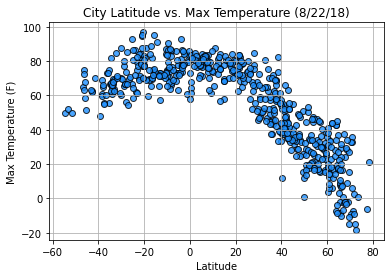

In [39]:
# x & y coordinates 
x1 = weatherpy_df["Lat"]
y1 =weatherpy_df["Max_Temp"]

#disply scatter plot
plt.scatter(x1, y1, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)

#label/title/ grid 

plt.title("City Latitude vs. Max Temperature (8/22/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the plot 
plt.savefig("../images/latitude_temp.png")


# Display the graph
plt.show()

## Latitude vs. Humidity Plot

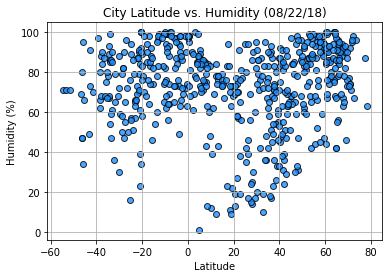

In [40]:
x2 = weatherpy_df["Lat"]
y2 = weatherpy_df["Humidity"]

plt.scatter(x2, y2, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)

plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../images/latitude_humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

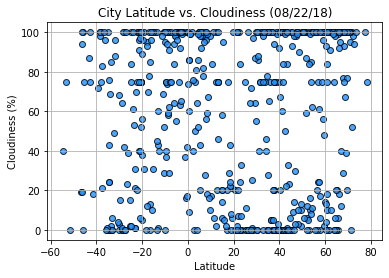

In [41]:
x3 = weatherpy_df["Lat"]
y3 = weatherpy_df["Cloudiness"]



plt.scatter(x3, y3, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)



plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



plt.savefig("../images/latitude_cloudiness.png")



plt.show()

## Latitude vs. Wind Speed Plot

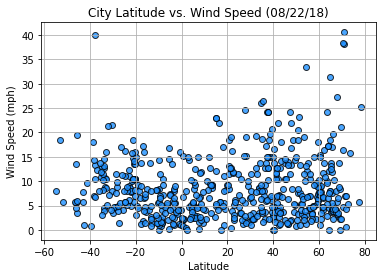

In [42]:
x4 = weatherpy_df["Lat"]
y4 = weatherpy_df["Wind_Speed"]


plt.scatter(x4, y4, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)


plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("../images/latitude_wind_speed.png")


plt.show()

## Linear Regression

In [50]:
# Create Northern and Southern Hemisphere DataFrames
#pull loc above and below the equator; note any cities directly on the equator (i.e. latitude = 0) are excluded
Northern_dF = weatherpy_df.loc[weatherpy_df["Lat"] > 0]
Southern_dF = weatherpy_df.loc[weatherpy_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  - Max Temp vs. Latitude Linear Regression


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression